In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Input
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data_path = r"brain tumour/Training"
test_data_path = r"brain tumour/Testing"

In [3]:
train_data_gen = ImageDataGenerator(rescale=1.0/255,
                                    zoom_range=0.2,
                                    shear_range=0.2,
                                    height_shift_range=0.1,
                                    width_shift_range=0.1
                                    
)

In [4]:
test_data_gen = ImageDataGenerator(rescale = 1.0/255)

In [5]:
train_data = train_data_gen.flow_from_directory(train_data_path,batch_size = 32,target_size=(150,150),class_mode='categorical'
                                                ,subset='training')

Found 2870 images belonging to 4 classes.


In [6]:
test_data = test_data_gen.flow_from_directory(test_data_path,batch_size=32,target_size=(150,150),class_mode='categorical')

Found 394 images belonging to 4 classes.


In [7]:
# val_data = train_data_gen.flow_from_directory(train_data_path,batch_size = 32,target_size=(150,150),class_mode='categorical'
#                                                 ,subset='validation')

In [8]:
model = Sequential()

model.add(Input(shape=(150,150,3)))

model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_data,epochs=10,validation_data = test_data)

Epoch 1/10


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.3684 - loss: 1.3207 - val_accuracy: 0.3147 - val_loss: 1.6548
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.5574 - loss: 1.0242 - val_accuracy: 0.3401 - val_loss: 2.3885
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.6319 - loss: 0.8703 - val_accuracy: 0.3782 - val_loss: 2.4422
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.6823 - loss: 0.7455 - val_accuracy: 0.3731 - val_loss: 3.1103
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.7144 - loss: 0.6893 - val_accuracy: 0.3680 - val_loss: 3.5933
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.7325 - loss: 0.6682 - val_accuracy: 0.3756 - val_loss: 2.2358
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.7388 - loss: 0.6527 - val_accuracy: 0.4721 - val_loss: 2.7687
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.7508 - loss: 0.5980 - val_accuracy: 0.4492 - val_loss: 2.

In [13]:
test_loss,test_acc = model.evaluate(test_data)
print(test_loss,test_acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 398ms/step - accuracy: 0.3762 - loss: 3.3056
3.366530418395996 0.3807106614112854


In [15]:
class_labels = list(train_data.class_indices.keys())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


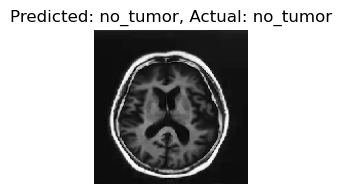

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


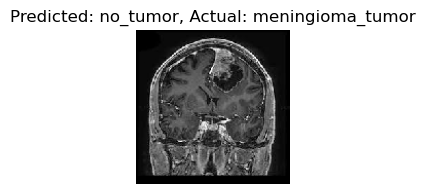

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


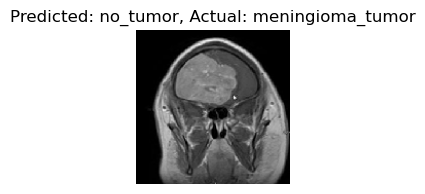

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


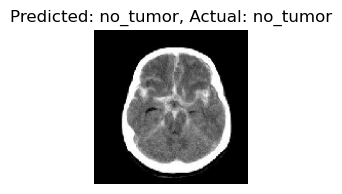

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


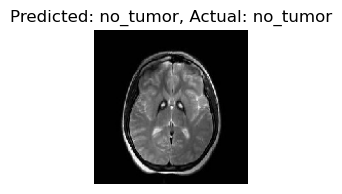

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


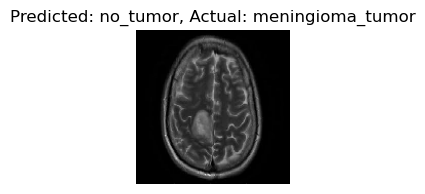

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


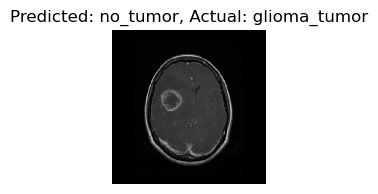

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


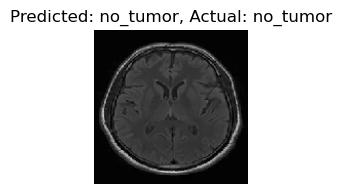

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


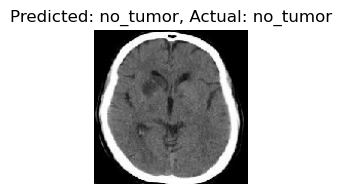

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


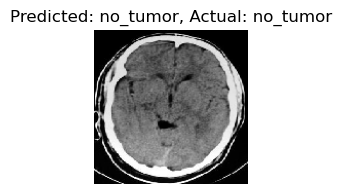

In [19]:

for i in range(10):
    sample_image,sample_label = next(test_data)
    predication = model.predict(sample_image)
    predicated_class = class_labels[np.argmax(predication[i])]
    actual_class = class_labels[np.argmax(sample_label[i])]
    
    plt.figure(figsize=(2,2))
    plt.imshow(sample_image[i])
    plt.title(f"Predicted: {predicated_class}, Actual: {actual_class}")
    plt.axis('off')
    plt.show()
      